In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import datetime
SRdir='/Users/jracusin/Fermi/Senior_Review/SR2019/'

In [2]:
def read_bib(dir=SRdir):
    file='fermi_bibcodes2.csv'
    bib0=ascii.read(dir+file)
    print bib0.keys()
    date=np.array(bib0['Date Published'])
    author=np.array(bib0['Author'])
    d=np.array(np.zeros(len(date)))
#    c=np.array(bib0['No. of Citations'])
    year=np.zeros(len(date))
    month=np.zeros(len(date))
    
    for i in range(len(date)):
        if len(date[i])==8: 
            year[i]=float(date[i][4:8])
            month[i]=float(datetime.datetime.strptime(date[i][0:3], '%b').month)
            d[i]=year[i]+month[i]/12.

    w=np.where(d>0)[0]
    d=d[w]
    year=year[w]
    month=month[w]
    author=author[w]
#    citations=c[w]
    return d,year,month,author#,citations


In [3]:
date,year,month,author=read_bib()

['Title', 'Author', 'Date Published', 'Bibcode', 'No. of Citations', 'Category', 'Subjects']


In [4]:
corr=1./(max(date)-max(year))

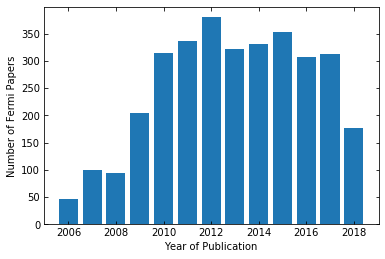

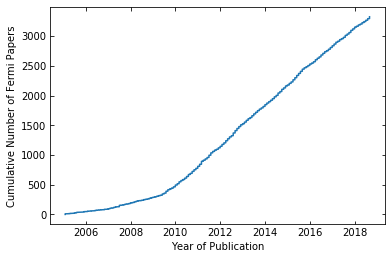

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[28, 63, 74, 146, 194, 234, 248, 199, 207, 197, 177, 181, 134]


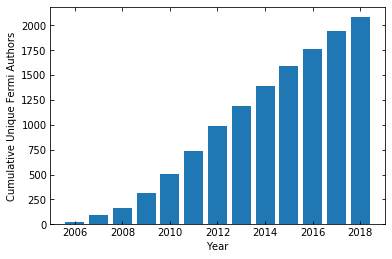

In [5]:
plot.figure()
ax=plot.axes()
h=np.histogram(year,bins=np.linspace(2005.5,2018.5,14))
#h[0][-1]=h[0][-1]*corr
plot.bar(h[1][:-1]+0.5,h[0])
plot.xlabel('Year of Publication')
plot.ylabel('Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig('Fermi_publications.pdf')
plot.show()

plot.figure()
s=np.argsort(date)
ax=plot.axes()
plot.plot(date[s],np.cumsum(np.ones(len(year[s]))))
plot.xlabel('Year of Publication')
plot.ylabel('Cumulative Number of Fermi Papers')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

### this can't be right, not list of authors, just first author
u,ind=np.unique(author,return_index=True)
print range(2006,2019)
n=[len(np.where((date[ind]>i) & (date[ind]<(i+1)))[0]) for i in range(2006,2019)]
print n
plot.figure()
ax=plot.axes()
plot.bar(range(2006,2019),np.cumsum(n))
plot.xlabel('Year')
plot.ylabel('Cumulative Unique Fermi Authors')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

In [6]:
# plot.figure()
# s=np.argsort(date)
# plot.plot(date[s],np.cumsum(citations[s]))
# plot.xlabel('Year of Publication')
# plot.ylabel('Cumulative Number of Citations to Fermi Papers')
# plot.show()

In [7]:
def lam2energy(wavelength):
    h=4.135667662e-15 #ev*s
    c=3e10 #cm/s
    energy=h*c/wavelength
    return energy

In [8]:
### MW/MM plot - ugh
minyear=2016
maxyear=2025
t=Table(rows=[('Fermi',2008.5,2020,2025,8e3,300e9,'tomato','tomato',20),\
             ('Optical Surveys',minyear,maxyear,maxyear,lam2energy(0.4e-4),lam2energy(1.2e-4),'green','green',12)],\
        names=('Mission','StartYear','StopYear','ExtendedYear','EnergyLow','EnergyHigh','color','ecolor','fontsize'))
## create object or table with mission name, year, extended years, color, energy range, 

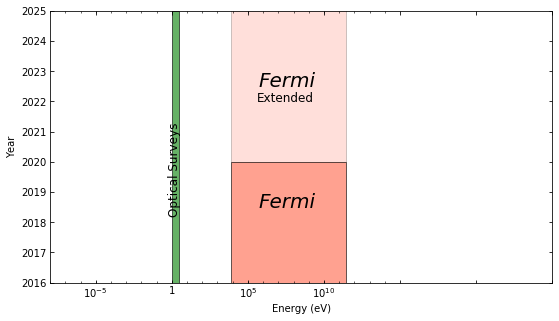

In [9]:
plot.figure(figsize=(9, 5))
ax=plot.axes()
for i in range(len(t)):
    width=(np.log10(t[i]['EnergyHigh'])-np.log10(t[i]['EnergyLow']))
    m=np.log10(t[i]['EnergyHigh'])-width/2.
    plot.bar(m,t[i]['StopYear']-minyear,color=t[i]['color'],width=width,bottom=minyear,alpha=0.6,edgecolor='black')
    if i>0: plot.annotate(t[i]['Mission'],(m-0.5,t[i]['StopYear']-4),fontsize=t[i]['fontsize'],rotation=90)
    if t[i]['ExtendedYear']>t[i]['StopYear']:
        plot.bar(m,t[i]['ExtendedYear']-minyear,color=t[i]['ecolor'],width=width,bottom=t[i]['StopYear'],alpha=0.2,edgecolor='black')
        if i==0:
            plot.annotate(t[i]['Mission'],(m-2,t[i]['StopYear']-1.5),fontsize=t[i]['fontsize'],style='italic')
            plot.annotate(t[i]['Mission'],(m-2,t[i]['ExtendedYear']-2.5),fontsize=t[i]['fontsize'],style='italic')
            plot.annotate('Extended',(m-2.1,t[i]['ExtendedYear']-3),fontsize=t[i]['fontsize']-8)
        
plot.rc('font',size=15)
plot.xlim([-8,25])
plot.ylim([minyear,maxyear])
#plot.xscale('log')
plot.ylabel('Year')
plot.xlabel('Energy (eV)')
plot.xticks(np.linspace(-5,25,7),[r'$10^{-5}$','1','$10^{5}$','$10^{10}$','','',''])
minor_ticks = np.arange(-8, 15, 1)
ax.set_xticks(minor_ticks, minor = True)
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'mw_mm.pdf')
plot.show()

In [10]:
### PG1553
file=SRdir+'withheader_Tabulated_PG1553+113_45day_march2018_lc.txt'
pg1553=ascii.read(file)
d=ascii.read(SRdir+'pg1553_component_fit.txt')

['yeardate', 'mjd', 'ts', 'flux(X10^-8)', 'dflux', 'photind', 'dphotind', 'ulflag']


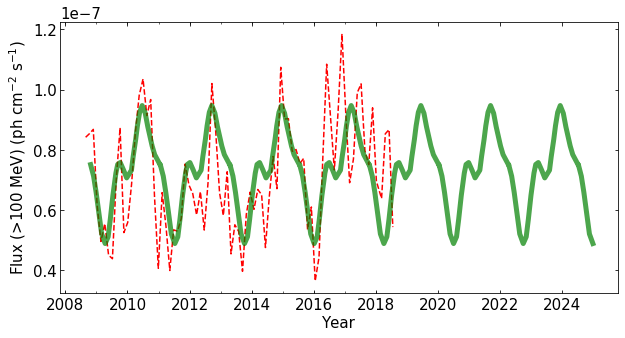

In [11]:
print pg1553.keys()
plot.figure(figsize=(10,5))
ax=plot.axes()
#plot.errorbar(pg1553['yeardate'],pg1553['flux(X10^-8)']*1e-8,pg1553['dflux']*1e-8)#,marker='o',linestyle='None')
plot.plot(pg1553['yeardate'],pg1553['flux(X10^-8)']*1e-8,color='red',linestyle='--')
plot.rc('font',size=15)
#plot.yscale('log')
plot.xlabel('Year')
plot.ylabel(r'Flux (>100 MeV) (ph cm$^{-2}$ s$^{-1}$)')
minor_ticks = np.arange(2008, 2019, 1)
ax.set_xticks(minor_ticks, minor = True)

flux0=d['flux']*1e-8
t=Time(d['mjd'],format='mjd',out_subfmt='date')
year0=[float(t.yday[i][0:4])+float(t.yday[i][5:8])/365. for i in range(len(d))]
year=[]
flux=[]
year=np.append(year0,year0+(np.max(year0)-np.min(year0)))
flux=np.append(flux0,flux0)
year=np.append(year,year0+2*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+3*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+4*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+5*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+6*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)
year=np.append(year,year0+7*(np.max(year0)-np.min(year0)))
flux=np.append(flux,flux0)

w=np.where(year <= 2025.)[0]
plot.plot(year[w],flux[w],linewidth=5,color='green',alpha=0.7)

ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.savefig(SRdir+'pg1553.pdf',bbox_inches='tight')
plot.show()

In [12]:
### GI's as a function of time
gi=ascii.read('/Users/jracusin/Fermi/Senior_Review/general/Cy1-11PIs-CoIs.csv')

In [13]:
name=[str(gi['col2'][i])+str(gi['col3'][i]) for i in range(len(gi))]
name=name[1:]
prop=gi['col1'][1:]
#for i in range(len(prop)): print prop[i]
p=np.array([float(prop[i]) for i in range(len(prop))])
u,ind=np.unique(name,return_index=True)
#print name
print len(ind)
n=[len(np.where((p[ind]>i*10000.) & (p[ind]<(i+1)*10000.))[0]) for i in range(1,12)]

1796


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
1795
[35, 245, 242, 114, 191, 182, 153, 162, 212, 168, 91]
7668


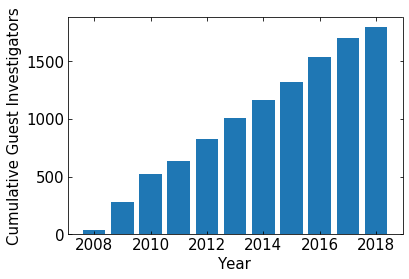

In [14]:
plot.figure()
ax=plot.axes()
print np.linspace(2008,2018,11)
print range(1,12)
print np.sum(n)
print n
print len(gi)
plot.bar(np.linspace(2008,2018,11),np.cumsum(n))
plot.xlabel('Year')
plot.ylabel('Cumulative Guest Investigators')
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
plot.show()

In [47]:
### phd theses
phds=ascii.read(SRdir+'Fermi_thesis_information_2019.csv')
years=np.array([float(phds['col4'][i]) for i in range(1,len(phds)-1)])

(array([ 1.,  1.,  2.,  0.,  4.,  3.,  6.,  4., 13., 33., 36., 28., 56.,
       31., 38., 38., 44.]), array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.]), <a list of 17 Patch objects>)


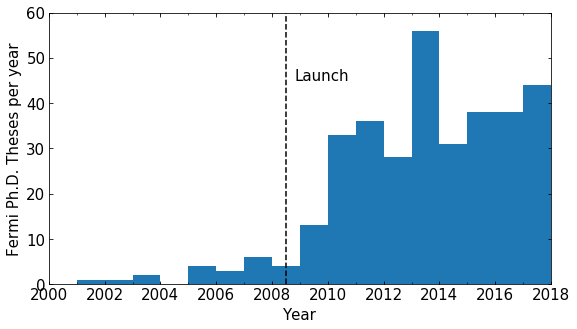

In [85]:
plot.figure(figsize=(9,5))
ax=plot.axes()
w=np.where(years<=2018.)[0]
y=int(max(years[w])-min(years[w]))
h=plot.hist(years[w],y)
plot.bar(h[1][:-1],h[0],width=0.0)
plot.plot([2008.5,2008.5],[0,60],color='black',linestyle='--')
plot.annotate('Launch',(2008.8,45))
print h
ax.tick_params(direction='in',axis='both',which='both',right=True,top=True)
ax.set_xticks(np.linspace(2000,2020,21),minor=True)
plot.xticks(np.linspace(2000,2018,10))
plot.xlim(2000,2018)
plot.ylim(0,60)
plot.xlabel('Year')
plot.ylabel('Fermi Ph.D. Theses per year')
plot.savefig(SRdir+'phd_theses.pdf')
plot.show()